# 1. 데이터 불러오기 및 둘러보기

- 프로젝트 목표 : 사기거래 여부를 예측하기 위한 데이터 전처리



1. 사기거래 여부를 예측하는 데 불필요한 컬럼을 제거합니다.
2. 최소 2개 이상의 새로운 피처(변수)를 생성해봅시다. [힌트] 구매 금액, 시간 등의 변수를 이용할 수 있습니다.


옵션


3. 데이터의 위도/경도 정보를 활용해볼 수 있을까요?
4. 통계적 관점으로 접근하여 유용한 변수를 만들어낼 수 있을까요?


데이터 설명 : https://www.kaggle.com/datasets/dermisfit/fraud-transactions-dataset?select=fraudTrain.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

In [2]:
cc_df = pd.read_csv('fraud.csv')

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
cc_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [6]:
cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


- 491134 개의 레코드와 22개 컬럼. 

- ** 결측치 없음.

# 2. 중복데이터 확인 및 처리

In [7]:
# 중복 데이터 확인

cc_df[cc_df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


# 3-0. 타깃 변수인 is_fraud 의 비율 확인

In [8]:
# 본격적인 탐색에 앞서 직관적이지 않은 컬럼의 이름을 변경하도록 한다.
cc_df = cc_df.rename({'amt': 'paid_amount'}, axis = 1)

In [9]:
cc_df['is_fraud'].mean() * 100

0.25329136243876416

- 전체 데이터의 약 0.25% 가 이상 거래에 해당한다.
- 이상 거래를 탐지하는 목표로 데이터를 분석하기 때문에 유독 튀는 이상치를 확인하는데 주의하며 데이터 탐색을 하기로 한다.


- 이상 거래에 해당하는 데이터의 통계량과 이상 거래를 포함하지 않은 데이터의 통계량을 비교해보며 그 특성을 살펴보기로 한다.

In [10]:
# 이상 거래 데이터를 cc_target_df 데이터프레임으로 생성
cc_target_df = cc_df[cc_df['is_fraud'] == 1]
cc_target_df

,trans_date_trans_time,cc_num,merchant,category,paid_amount,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
4794,2019-01-12 00:59:01,581686439828,"fraud_Zieme, Bode and Dooley",gas_transport,11.73,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1
4816,2019-01-12 03:48:07,581686439828,fraud_Koepp-Witting,grocery_pos,328.68,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1
4979,2019-01-12 15:46:10,581686439828,fraud_Abernathy and Sons,food_dining,120.58,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1
5073,2019-01-12 19:53:59,581686439828,fraud_Boyer-Reichert,shopping_net,1081.35,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1
5124,2019-01-12 22:44:05,581686439828,fraud_Fisher-Schowalter,shopping_net,776.70,Larry,House,M,911 Sabrina Trafficway,Cochranton,PA,16314,41.5205,-80.0573,5507,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477832,2020-12-21 02:21:41,4716561796955522,fraud_Murray-Smitham,grocery_pos,358.24,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,8a5d80eb4f573480db90899dd8b1c34a,1387592501,47.526202,-113.643313,1
477847,2020-12-21 02:36:03,4716561796955522,fraud_Schmidt and Sons,shopping_net,859.12,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,fe8464ee336fe08b2adacdd0867b1343,1387593363,48.272348,-112.328075,1
479296,2020-12-21 22:38:38,4716561796955522,fraud_Quitzon-Goyette,home,209.84,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,7cde9b7604a025e251756a4bc9615888,1387665518,49.173669,-112.698767,1
479305,2020-12-21 22:42:11,4716561796955522,fraud_Schulist Ltd,food_dining,123.58,Lauren,Anderson,F,11014 Chad Lake Apt. 573,Heart Butte,MT,59448,48.2777,-112.8456,743,Water engineer,1972-05-04,daabc7ccf6ccf2c85c1f6186ca11193a,1387665731,48.913048,-113.214921,1


In [11]:
# 이상 거래 데이터를 포함하지 않은 cc_non_target_df 데이터프레임 생성
cc_non_target_df = cc_df[cc_df['is_fraud'] == 0]

In [12]:
# 이상 거래 데이터 통계량
cc_target_df.describe()

,cc_num,paid_amount,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.244000e+03,1244.000000,1244.000000,1244.000000,1244.000000,1.244000e+03,1.244000e+03,1244.000000,1244.000000,1244.0
mean,3.802642e+17,477.958328,49169.089228,38.018846,-89.781168,7.976371e+04,1.355786e+09,38.027885,-89.794773,1.0
std,1.273204e+18,398.229485,26821.464413,5.328383,12.540186,2.592555e+05,1.823747e+07,5.337767,12.573992,0.0
min,5.038744e+11,6.380000,1843.000000,24.655700,-122.345600,4.600000e+01,1.326330e+09,23.722663,-123.130516,1.0
25%,2.131124e+14,22.895000,28253.750000,34.032600,-96.601200,8.950000e+02,1.338170e+09,34.057762,-96.518615,1.0
50%,3.527537e+15,334.750000,48174.000000,38.893800,-86.790400,4.542000e+03,1.356657e+09,38.756641,-87.271420,1.0
75%,4.642255e+15,865.385000,72165.000000,41.606000,-80.307000,3.423875e+04,1.371855e+09,41.728511,-80.511924,1.0
max,4.956829e+18,1371.810000,99323.000000,48.887800,-69.965600,2.906700e+06,1.387667e+09,49.579889,-69.006486,1.0


In [13]:
# 이상 거래가 아닌 데이터 통계량
cc_non_target_df.describe()

,cc_num,paid_amount,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.898900e+05,489890.000000,489890.000000,489890.000000,489890.000000,4.898900e+05,4.898900e+05,489890.000000,489890.000000,489890.0
mean,3.705768e+17,68.011761,50774.599002,37.931007,-90.497433,1.214979e+05,1.358738e+09,37.930024,-90.497190,0.0
std,1.260197e+18,157.926044,26854.938719,5.341229,12.991819,3.728133e+05,1.819332e+07,5.373078,13.005139,0.0
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.0
25%,2.131124e+14,8.950000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343104e+09,33.780872,-96.985554,0.0
50%,3.531130e+15,42.080000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357258e+09,38.544135,-87.574118,0.0
75%,4.653879e+15,80.060000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374638e+09,41.624159,-80.685961,0.0
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,0.0


In [14]:
477.958328 - 68.011761

409.94656699999996

### 눈에 띄는 특성
1. 이상 거래 데이터와 정상 거래 데이터의 결제 금액(paid_amount)이 평균적으로 410 만큼 큰 차이(478 vs 68)가 난다.
2. 두 데이터의 최댓값은 1372 vs 25087 로, 이상 거래의 경우 1372 값을 넘지 않음을 알 수 있다.

### 분석 전략 : 


##### 앞으로 이상 거래 데이터와 정상 거래 데이터의 컬럼별 데이터 특성을 비교확인해 가며 이상 거래 데이터의 특징을 확인해본다.

# 3-1. trans_date_trans_time   컬럼

In [15]:
# 이상 거래 데이터의 trans_date_trans_time 컬럼 확인 
cc_target_df['trans_date_trans_time'].sort_values()

4794      2019-01-12 00:59:01
4816      2019-01-12 03:48:07
4979      2019-01-12 15:46:10
5073      2019-01-12 19:53:59
5124      2019-01-12 22:44:05
                 ...         
477832    2020-12-21 02:21:41
477847    2020-12-21 02:36:03
479296    2020-12-21 22:38:38
479305    2020-12-21 22:42:11
479341    2020-12-21 22:59:22
Name: trans_date_trans_time, Length: 1244, dtype: object

In [16]:
# 정상 거래 데이터의 trans_date_trans_time 컬럼 확인 
cc_non_target_df['trans_date_trans_time'].sort_values()

0         2019-01-01 00:00:44
1         2019-01-01 00:12:34
2         2019-01-01 00:17:16
3         2019-01-01 00:20:15
4         2019-01-01 00:23:41
                 ...         
491129    2020-12-31 23:56:48
491130    2020-12-31 23:56:57
491131    2020-12-31 23:59:09
491132    2020-12-31 23:59:15
491133    2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 489890, dtype: object

In [17]:
# trans_date_trans_time 컬럼을 히스토그램으로 그냥 확인하면 커널이 죽게 됨
# 데이터 타입으로 변경 후 연월일로만 확인

# 이상 거래 데이터
cc_target_df['trans_date_trans_time'] = pd.to_datetime(cc_target_df['trans_date_trans_time']).dt.date

# 정상 거래 데이터
cc_non_target_df['trans_date_trans_time'] = pd.to_datetime(cc_non_target_df['trans_date_trans_time']).dt.date

/tmp/ipykernel_432/1171581173.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_target_df['trans_date_trans_time'] = pd.to_datetime(cc_target_df['trans_date_trans_time']).dt.date
/tmp/ipykernel_432/1171581173.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_non_target_df['trans_date_trans_time'] = pd.to_datetime(cc_non_target_df['trans_date_trans_time']).dt.date


<Figure size 864x432 with 0 Axes>

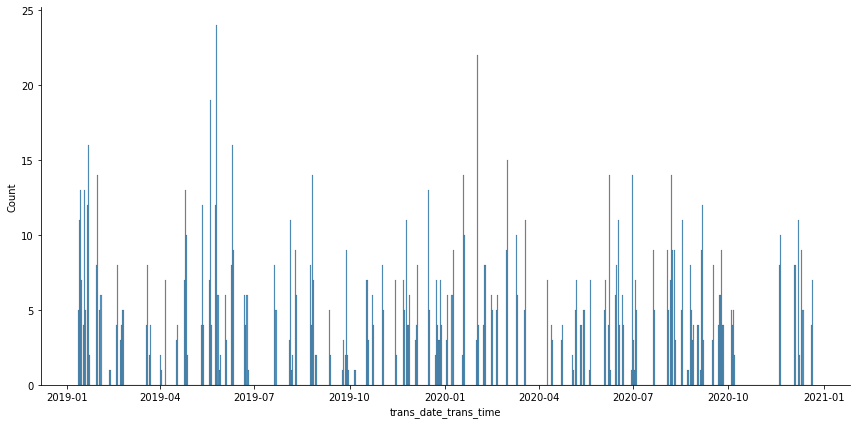

In [18]:
# 히스토그램으로 비교

# 이상 거래 데이터
plt.figure(figsize=(12, 6))  # 전체 그래프의 크기 설정
sns.displot(cc_target_df['trans_date_trans_time'], height=6, aspect=2)

<Figure size 864x432 with 0 Axes>

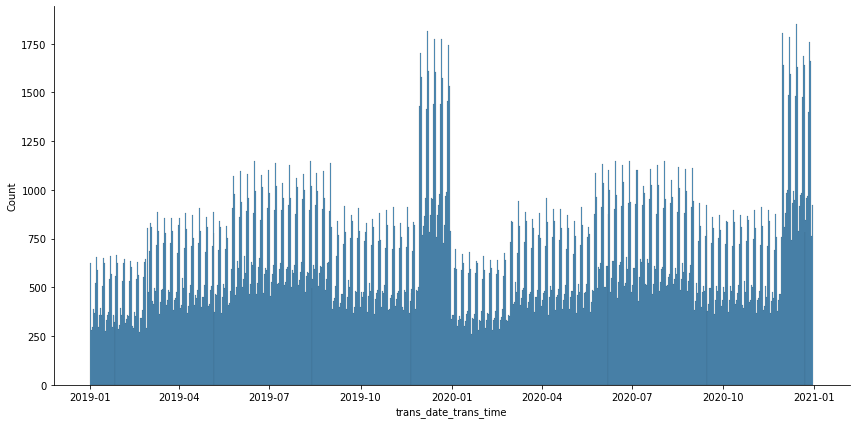

In [19]:
# 정상 거래 데이터
plt.figure(figsize=(12, 6))
sns.displot(cc_non_target_df['trans_date_trans_time'], height=6, aspect=2)

### Insight
1. 정상 거래 데이터는 연말에 고점을 찍는 계절성을 보이는 반면, 이상 거래 데이터는 비교적 전체적으로 고른 분포를 보인다.
2. 이 경우 이상 거래 발생일은 특정한 패턴이 없이 Random 한 것으로 종속변수인 이상 거래 발생과 독립적이라고 할 수 있다.
3. 따라서 예측 모델링에 날짜 데이터를 삭제하기로 한다.

In [20]:
# trans_date_trans_time 컬럼 삭제
cc_target_df.drop(['trans_date_trans_time'], axis = 1, inplace = True)
cc_non_target_df.drop(['trans_date_trans_time'], axis = 1, inplace = True)

/opt/conda/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# 3-2. cc_num 컬럼 (credit card number)

In [21]:
# 이상 거래 데이터의 cc_num 컬럼 확인 
cc_target_df['cc_num'].value_counts()

6538441737335434    18
3589289942931264    16
3576021480694169    16
213112402583773     16
3518669219150142    16
                    ..
4908846471916297     3
3576431665303017     2
6011109736646996     2
3518234918950662     2
6011893664860915     2
Name: cc_num, Length: 122, dtype: int64

In [22]:
cc_target_df['cc_num'].value_counts().mean()

10.19672131147541

In [23]:
cc_target_df['cc_num'].value_counts().std()

3.8690109019886925

- 122 개의 신용카드가 평균적으로 10 회에 걸쳐 이상 거래에 사용되었다.

In [24]:
# 정상 거래 데이터의 cc_num 컬럼 확인 
cc_non_target_df['cc_num'].value_counts()

3583635130604947    4380
6011367958204270    4380
30270432095985      4377
36722699017270      4376
180094419304907     4374
                    ... 
371226440126102     3631
3500969075198072    3631
213157767990030     3629
4005676619255478    3628
3511378610369890    3617
Name: cc_num, Length: 124, dtype: int64

In [25]:
cc_non_target_df['cc_num'].value_counts().mean()

3950.7258064516127

In [26]:
cc_non_target_df['cc_num'].value_counts().std()

361.69082019027445

- 정상 거래 데이터의 경우 124개의 신용카드가 평균적으로 3950 회 거래에 사용되었다

In [27]:
# 이상 거래와 정상 거래에 중복으로 사용된 카드가 있는지 확인해본다.
cc_target_df[['cc_num', 'is_fraud']].merge(cc_non_target_df[['cc_num', 'is_fraud']], on = 'cc_num', how = 'inner')

,cc_num,is_fraud_x,is_fraud_y
0,581686439828,1,0
1,581686439828,1,0
2,581686439828,1,0
3,581686439828,1,0
4,581686439828,1,0
...,...,...,...
4889593,4716561796955522,1,0
4889594,4716561796955522,1,0
4889595,4716561796955522,1,0
4889596,4716561796955522,1,0


- 결과를 보면 대부분의 카드가 정상 거래, 이상 거래에 같이 사용되었음을 알 수 있다.
- 해당 데이터셋은 현실을 최대한 반영하며 만든 허구 데이터이기 때문에 큰 의미를 두지 않고 탐색을 진행하기로 한다.

# 3-3. merchant 컬럼

In [28]:
# merchant 컬럼 안의 'fraud_' 문자열 제거
cc_target_df['merchant'] = cc_target_df['merchant'].str.replace('fraud_', '')
cc_non_target_df['merchant'] = cc_non_target_df['merchant'].str.replace('fraud_', '')

/tmp/ipykernel_432/991990541.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_target_df['merchant'] = cc_target_df['merchant'].str.replace('fraud_', '')
/tmp/ipykernel_432/991990541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc_non_target_df['merchant'] = cc_non_target_df['merchant'].str.replace('fraud_', '')


In [29]:
# 이상 거래 데이터의 merchant 컬럼 확인 
cc_target_df['merchant'].value_counts()

Moen, Reinger and Murphy           11
Gottlieb, Considine and Schultz     9
Kilback LLC                         9
Hudson-Ratke                        9
Langworth, Boehm and Gulgowski      9
                                   ..
Dare-Marvin                         1
Rolfson-Kunde                       1
Harber Inc                          1
Hyatt, Russel and Gleichner         1
Quitzon-Goyette                     1
Name: merchant, Length: 497, dtype: int64

In [30]:
cc_target_df['merchant'].value_counts().mean()

2.5030181086519114

In [31]:
cc_target_df['merchant'].value_counts().std()

1.7894434353002493

- 이상 거래에 포함된 사업주는 497명이 되고, 인당 평균 2.5회의 이상 거래가 이루어졌다.

In [32]:
# 정상 거래 데이터의 merchant 컬럼 확인 
cc_non_target_df['merchant'].value_counts()

Kilback LLC                      1593
Cormier LLC                      1451
Kuhn LLC                         1439
Schumm PLC                       1387
Boyer PLC                        1368
                                 ... 
Douglas, DuBuque and McKenzie     228
Little-Gleichner                  227
Satterfield-Lowe                  226
Reichert-Weissnat                 226
Jerde-Hermann                     226
Name: merchant, Length: 693, dtype: int64

In [33]:
cc_non_target_df['merchant'].value_counts().mean()

706.9119769119769

In [34]:
cc_non_target_df['merchant'].value_counts().std()

198.50999025031123

- 정상 거래는 총 693 명의 사업주에게서 평균 706회의 정상 거래가 이루어졌다.

# 3-4. category 컬럼

- category 종류에 따른 이상 거래 비율을 찾아본다.

In [35]:
# 이상 거래 데이터
fraud_category = cc_target_df['category'].value_counts()
fraud_category = pd.DataFrame(fraud_category)
non_fraud_category = cc_non_target_df['category'].value_counts()
non_fraud_category = pd.DataFrame(non_fraud_category)

# join 을 사용하여 인덱스 category 을 기준으로 inner join 한다.
category_joined_df = fraud_category.join(non_fraud_category, lsuffix = '_f', rsuffix = '_n')

# 이상 거래 비율을 FN_ratio_category 컬럼에 저장
category_joined_df['FN_ratio_category'] = category_joined_df['category_f'] / (category_joined_df['category_f'] 
                                                                              + category_joined_df['category_n'])

# 이상 거래 비율을 정렬
category_joined_df['FN_ratio_category'].sort_values()

grocery_net       0.000327
health_fitness    0.001273
entertainment     0.001576
personal_care     0.001633
home              0.001661
kids_pets         0.001688
food_dining       0.001723
misc_pos          0.001759
travel            0.001902
gas_transport     0.002194
shopping_pos      0.002772
misc_net          0.004329
grocery_pos       0.005056
shopping_net      0.006177
Name: FN_ratio_category, dtype: float64

## Insight
- 총 14개의 카테고리별 소비 유형에서 shopping_net, grocery_pos, misc_net 의 이상 거래 비율이 높게 나오고, grocery_net, health_fitness이 낮은 이상 거래 비율을 보였다.
- 유형별 사기 거래 비율 FN_ratio_category 컬럼을 category 컬럼과 join 하여 예측 모델링에 가중치로 활용해보기로 한다.

In [36]:
# 곱하기 1000 값을 추후 주별 가중치로 활용한다
category_joined_df['FN_ratio_category'] = category_joined_df['FN_ratio_category'] * 1000

# FN_ratio_category 컬럼 외 제거
category_joined_df = pd.DataFrame(category_joined_df['FN_ratio_category'])

# join 을 위한 category 컬럼 재설정
category_joined_df.reset_index(inplace = True)
category_joined_df = category_joined_df.rename({'index': 'category'}, axis = 1)

# merge 를 사용하여 category 를 기준으로 조인
cc_target_df = cc_target_df.merge(category_joined_df, on = 'category', how = 'left')
cc_non_target_df = cc_non_target_df.merge(category_joined_df, on = 'category', how = 'left')

# 확인
cc_target_df['FN_ratio_category'].head()

0    2.194269
1    5.055943
2    1.723180
3    6.176778
4    6.176778
Name: FN_ratio_category, dtype: float64

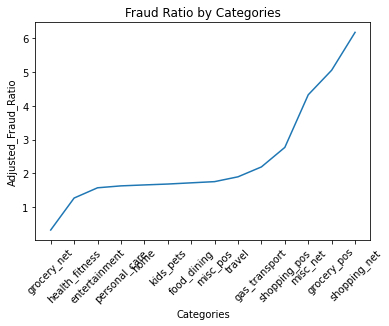

In [37]:
# 시각화로 확인

# 시각화를 위한 정렬
his_data = category_joined_df.sort_values(by = 'FN_ratio_category')

# 선 그리기
plt.plot(his_data['category'], his_data['FN_ratio_category'])

# 그래프에 제목과 라벨 추가
plt.title('Fraud Ratio by Categories')
plt.xlabel('Categories')
plt.ylabel('Adjusted_Fraud_Ratio')

# x 축 눈금을 45도로 회전
plt.xticks(rotation=45)

# 그래프 표시
plt.show()

- 히스토그램 분포 비교는 별 의미가 없어 보인다.

# 3-5. paid_amount 컬럼

In [38]:
# 이상 거래 데이터의 paid_amount 컬럼 확인 
cc_target_df['paid_amount'].sort_values()

219       6.38
840       6.44
962       6.67
389       6.69
229       6.70
        ...   
836    1253.93
263    1262.19
856    1276.77
49     1334.07
407    1371.81
Name: paid_amount, Length: 1244, dtype: float64

In [39]:
cc_target_df['paid_amount'].sort_values().mean()

477.95832797427653

In [40]:
cc_target_df['paid_amount'].sort_values().std()

398.22948515674693

- 이상 거래 데이터에서 평균 478, 표준편차 398 만큼의 거래액이 발생하였다.

In [41]:
# 정상 거래 데이터의 paid_amount 컬럼 확인 
cc_non_target_df['paid_amount'].sort_values()

18781         1.00
261938        1.00
228540        1.00
164870        1.00
427936        1.00
            ...   
43242     14630.68
198188    15047.03
408905    16837.08
49266     17897.24
92689     25086.94
Name: paid_amount, Length: 489890, dtype: float64

In [42]:
cc_non_target_df['paid_amount'].sort_values().mean()

68.0117611300496

In [43]:
cc_non_target_df['paid_amount'].sort_values().std()

157.92604394643888

- 정상 거래 데이터에서 평균 68, 표준편차 158 만큼의 거래액이 발생하였다.

<AxesSubplot:ylabel='paid_amount'>

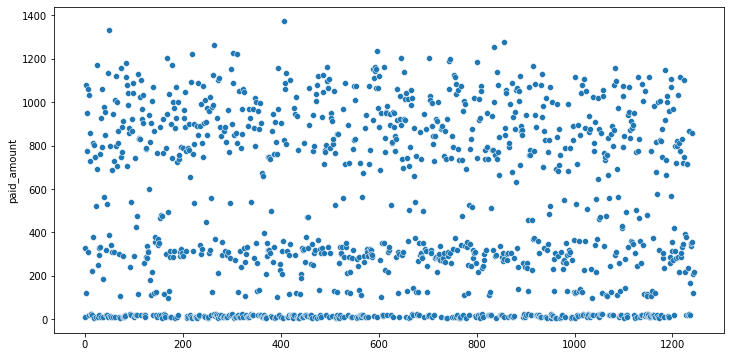

In [44]:
# 산점도로 확인

# 이상 거래 데이터
plt.figure(figsize=(12, 6))
sns.scatterplot(x = cc_target_df.index, y = cc_target_df['paid_amount'])

<AxesSubplot:ylabel='paid_amount'>

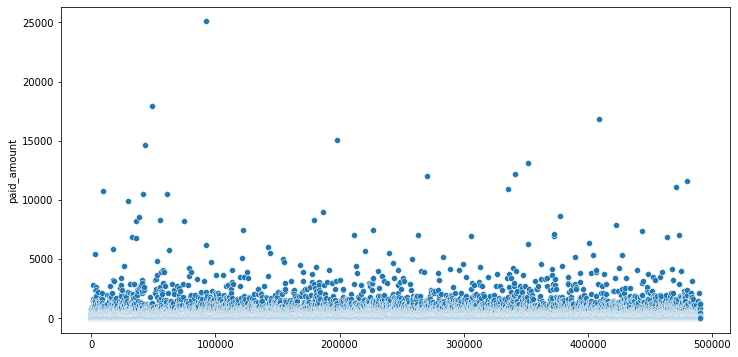

In [45]:
# 정상 거래 데이터
plt.figure(figsize=(12, 6))
sns.scatterplot(x = cc_non_target_df.index, y = cc_non_target_df['paid_amount'])

- 산점도를 보면 이상 거래가 정상 거래에 비해 range 가 1400 을 넘지 않는 것으로 나타난다.
- 매우 큰 금액으로 이상 거래가 이루어지지는 않았음을 알 수 있다.

# 3-6. first, last 컬럼

In [46]:
# first, last 컬럼을 합쳐 해당 카드의 소유자(거래의 당사자)의 전체 이름을 holder_name 의 컬럼으로 대체하기로 한다.
cc_target_df['holder_name'] = cc_target_df['first']+ ' ' + cc_target_df['last']
cc_non_target_df['holder_name'] = cc_non_target_df['first']+ ' ' + cc_non_target_df['last']

# first, last 컬럼은 삭제
cc_target_df.drop(['first','last'], axis = 1, inplace = True)
cc_non_target_df.drop(['first','last'], axis = 1, inplace = True)

In [47]:
# 이상 거래 데이터
cc_target_df['holder_name'].value_counts()

Gina Grimes         18
Paula Estrada       16
Dawn Gray           16
Ana Howell          16
Dorothy Thomas      16
                    ..
Lauren Torres        3
Jessica Ward         2
Rebecca Erickson     2
Barbara Lowe         2
Erin Chavez          2
Name: holder_name, Length: 122, dtype: int64

In [48]:
cc_target_df['holder_name'].value_counts().mean()

10.19672131147541

In [49]:
# 정상 거래 데이터
cc_non_target_df['holder_name'].value_counts()

Crystal Gamble     4380
Tammy Ayers        4380
Lisa Lin           4377
Jessica Perez      4376
Sharon Smith       4374
                   ... 
Stacy Lambert      3631
Kenneth Sanchez    3631
Tara Campbell      3629
William Perry      3628
James Cooper       3617
Name: holder_name, Length: 124, dtype: int64

In [50]:
cc_non_target_df['holder_name'].value_counts().mean()

3950.7258064516127

- 이상 거래의 경우 122명의 카드 소유자가 평균 10회에 걸쳐 사기 거래를 하였고, 정상 거래의 경우 124명의 카드 소유자가 평균 3950회에 걸쳐 정상적인 거래를 하였다.
- 앞서 신용 카드 번호에 따른 이상 거래, 정상 거래 중복 여부를 확인했을 때 대부분의 신용카드가 이에 해당함을 확인하였다. 카드 번호는 곧 카드 소유자 명과 일치하기 때문에, 대부분의 카드 소유자 또한 이상거래와 정상거래가 중복된 결과가 나올 것임을 알 수 있다.

# 3-7. gender 컬럼

In [51]:
# 성별에 따른 이상 거래, 정상 거래의 비율을 비교할 수 있다.

# 이상 거래 데이터의 gender 컬럼 확인 
cc_target_df['gender'].value_counts()

F    848
M    396
Name: gender, dtype: int64

In [52]:
# 정상 거래 데이터의 gender 컬럼 확인 
cc_non_target_df['gender'].value_counts()

F    351597
M    138293
Name: gender, dtype: int64

In [53]:
351597 / (351597 + 138293)

0.7177060156361632

- 이상 거래의 경우 여/남 비율이 약 68%, 정상 거래의 경우 약 72% 로 여성의 비율이 높았다.

<Figure size 432x432 with 0 Axes>

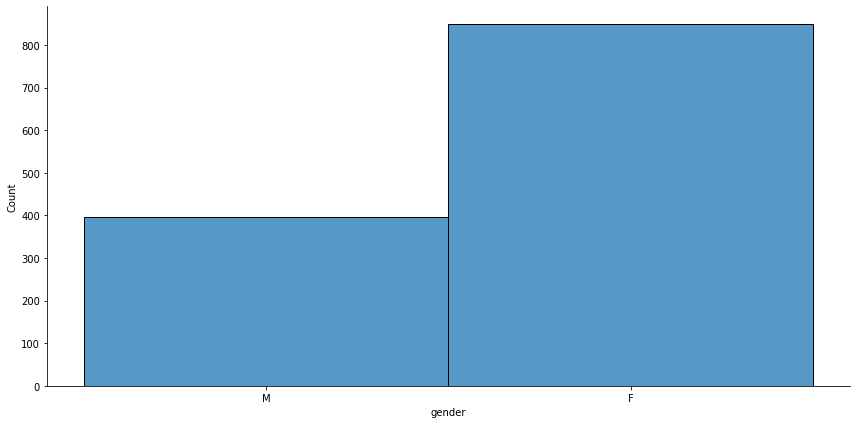

In [54]:
# 히스토그램으로 비교

# 이상 거래 데이터
plt.figure(figsize=(6, 6))  
sns.displot(cc_target_df['gender'], height=6, aspect=2)

<Figure size 432x432 with 0 Axes>

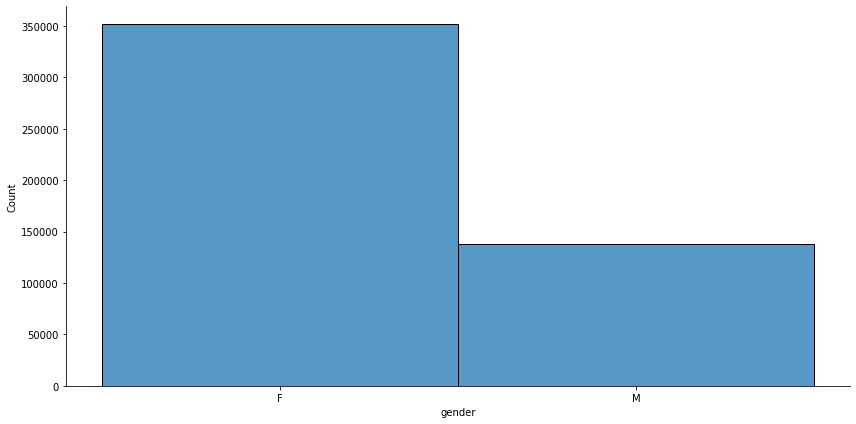

In [55]:
# 정상 거래 데이터
plt.figure(figsize=(6, 6))  
sns.displot(cc_non_target_df['gender'], height=6, aspect=2)

# 3-8. street,  city, state 컬럼

In [56]:
# 주 별로 이상 거래 발생 비율을 찾아보기로 한다.
fraud_states = cc_target_df['state'].value_counts()
fraud_states = pd.DataFrame(fraud_states)
non_fraud_states = cc_non_target_df['state'].value_counts()
non_fraud_states = pd.DataFrame(non_fraud_states)

# join 을 사용하여 인덱스 - 주 축약명 - 를 기준으로 inner join 한다.
state_joined_df = fraud_states.join(non_fraud_states, lsuffix = '_f', rsuffix = '_n')

# 이상 거래 비율을 FN_ratio_state 컬럼에 저장
state_joined_df['FN_ratio_state'] = state_joined_df['state_f'] / (state_joined_df['state_f'] + state_joined_df['state_n'])

# 이상 거래 비율을 정렬
state_joined_df['FN_ratio_state'].sort_values()

CO    0.000457
AZ    0.001029
ID    0.001373
CA    0.001433
MS    0.001832
NC    0.001899
OH    0.001992
LA    0.002060
WV    0.002221
MI    0.002320
WI    0.002327
MO    0.002336
NY    0.002354
IN    0.002418
TX    0.002418
WA    0.002488
CT    0.002510
ND    0.002511
MT    0.002520
PA    0.002542
TN    0.002601
VA    0.002604
MN    0.002613
AR    0.002626
AL    0.002689
UT    0.002736
OK    0.002739
IL    0.002803
KS    0.002913
MD    0.002934
FL    0.002934
NJ    0.002985
NM    0.003102
SC    0.003175
IA    0.003200
MA    0.003286
NV    0.003420
NE    0.003426
VT    0.003487
GA    0.003566
KY    0.003614
ME    0.003658
WY    0.003843
SD    0.004372
Name: FN_ratio_state, dtype: float64

#### Insignt

- 콜로라도(CO)가 0.046%로 사기 거래 비율이 가장 적었고, 사우스다코다(SD)의 사기 거래 비율이 0.44%로 가장 높았다.
- 주별 사기 거래 비율 FN_ratio 컬럼을 추후 state 컬럼과 join 하여 예측 모델링에 가중치로 활용해보기로 한다.

In [57]:
# 곱하기 1000 값을 추후 주별 가중치로 활용한다
state_joined_df['FN_ratio_state'] = state_joined_df['FN_ratio_state'] * 1000

# FN_ratio 컬럼 외 제거
state_joined_df = pd.DataFrame(state_joined_df['FN_ratio_state'])

# join 을 위한 state 컬럼 재설정
state_joined_df.reset_index(inplace = True)
state_joined_df = state_joined_df.rename({'index': 'state'}, axis = 1)

# merge 를 사용하여 state 를 기준으로 조인
cc_target_df = cc_target_df.merge(state_joined_df, on = 'state', how = 'left')
cc_non_target_df = cc_non_target_df.merge(state_joined_df, on = 'state', how = 'left')

# 확인
cc_target_df['FN_ratio_state'].head()

0    2.541793
1    2.541793
2    2.541793
3    2.541793
4    2.541793
Name: FN_ratio_state, dtype: float64

In [58]:
# street, city, state 컬럼은 분석에 활용하지 않을 것이므로 삭제하도록 한다.
cc_target_df.drop(['street', 'city', 'state'], axis = 1, inplace = True)
cc_non_target_df.drop(['street', 'city', 'state'], axis = 1, inplace = True)

# 3-9. zip 컬럼

- zip 컬럼은 앞선 street, city, state 컬럼과 같이 주소와 관련된 우편번호이기 때문에 분석에 활용하지 않을 것이므로 삭제한다.

In [59]:
# zip 컬럼 삭제
cc_target_df.drop(['zip'], axis = 1, inplace = True)
cc_non_target_df.drop(['zip'], axis = 1, inplace = True)

# 3-10. lat, long 컬럼

- 위도, 경도 데이터 또한 분석에 활용하지 않는다. 

In [60]:
# lat, long 컬럼 삭제
cc_target_df.drop(['lat', 'long'], axis = 1, inplace = True)
cc_non_target_df.drop(['lat', 'long'], axis = 1, inplace = True)

# 3-11. city_pop 컬럼

- 인구 데이터 또한 분석에 활용하지 않는다.

In [61]:
# city_pop 컬럼 삭제
cc_target_df.drop(['city_pop'], axis = 1, inplace = True)
cc_non_target_df.drop(['city_pop'], axis = 1, inplace = True)

# 3-12. job 컬럼

In [62]:
# 직업별 이상 거래 발생 비율을 찾아보기로 한다.
fraud_job = cc_target_df['job'].value_counts()
fraud_job = pd.DataFrame(fraud_job)
non_fraud_job = cc_non_target_df['job'].value_counts()
non_fraud_job = pd.DataFrame(non_fraud_job)

# join 을 사용하여 인덱스 job 을 기준으로 inner join 한다.
job_joined_df = fraud_job.join(non_fraud_job, lsuffix = '_f', rsuffix = '_n')

# 이상 거래 비율을 FN_ratio_job 컬럼에 저장
job_joined_df['FN_ratio_job'] = job_joined_df['job_f'] / (job_joined_df['job_f'] + job_joined_df['job_n'])

# 이상 거래 비율을 정렬
job_joined_df['FN_ratio_job'].sort_values()

English as a second language teacher     0.000458
Contractor                               0.000458
Systems developer                        0.000549
Radiographer, therapeutic                0.000686
Health physicist                         0.000686
                                           ...   
Race relations officer                   0.004114
Secondary school teacher                 0.004367
Futures trader                           0.004370
Development worker, international aid    0.004372
Hospital doctor                          0.004379
Name: FN_ratio_job, Length: 108, dtype: float64

- Insight
1. 병원 의사, 개발업 종사자, 선물 트레이더, 고등학교 교사 등이 사기 거래 비율이 높은 반면에 ESL 교사, 하청업자(?), 시스템 개발자, 방사성 촬영 기사 등이 사기 거래 비율이 낮았다.
2. FN_ratio_job 컬럼 또한 * 1000 값으로 job 컬럼을 수치형 데이터로 치환하여 사용한다.

In [63]:
# 곱하기 1000 값을 추후 주별 가중치로 활용한다
job_joined_df['FN_ratio_job'] = job_joined_df['FN_ratio_job'] * 1000

# FN_ratio_job 컬럼 외 제거
job_joined_df = pd.DataFrame(job_joined_df['FN_ratio_job'])

# join 을 위한 job 컬럼 재설정
job_joined_df.reset_index(inplace = True)
job_joined_df = job_joined_df.rename({'index': 'job'}, axis = 1)

# merge 를 사용하여 job 를 기준으로 조인
cc_target_df = cc_target_df.merge(job_joined_df, on = 'job', how = 'left')
cc_non_target_df = cc_non_target_df.merge(job_joined_df, on = 'job', how = 'left')

# 확인
cc_target_df.head()

,cc_num,merchant,category,paid_amount,gender,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,FN_ratio_category,holder_name,FN_ratio_state,FN_ratio_job
0,581686439828,"Zieme, Bode and Dooley",gas_transport,11.73,M,Retail merchandiser,1973-07-28,77c44b4cff9a624f54d389887605dbb2,1326329941,41.947427,-79.796264,1,2.194269,Larry House,2.541793,2.737476
1,581686439828,Koepp-Witting,grocery_pos,328.68,M,Retail merchandiser,1973-07-28,90e7917ee506a5b1ea068bdf2fac064b,1326340087,42.148618,-79.398595,1,5.055943,Larry House,2.541793,2.737476
2,581686439828,Abernathy and Sons,food_dining,120.58,M,Retail merchandiser,1973-07-28,aaac448ccb3f869994c4f1cad95dba18,1326383170,42.470024,-80.126576,1,1.723180,Larry House,2.541793,2.737476
3,581686439828,Boyer-Reichert,shopping_net,1081.35,M,Retail merchandiser,1973-07-28,8545f40c91a37f8015749b0f962cff20,1326398039,42.455406,-79.521640,1,6.176778,Larry House,2.541793,2.737476
4,581686439828,Fisher-Schowalter,shopping_net,776.70,M,Retail merchandiser,1973-07-28,3b6d88a3c7349cb3ee408bce6e4ffac2,1326408245,40.680209,-79.099101,1,6.176778,Larry House,2.541793,2.737476


In [64]:
cc_target_df.isna().sum()

cc_num               0
merchant             0
category             0
paid_amount          0
gender               0
job                  0
dob                  0
trans_num            0
unix_time            0
merch_lat            0
merch_long           0
is_fraud             0
FN_ratio_category    0
holder_name          0
FN_ratio_state       0
FN_ratio_job         0
dtype: int64

In [65]:
cc_non_target_df.isna().sum()

cc_num                  0
merchant                0
category                0
paid_amount             0
gender                  0
job                     0
dob                     0
trans_num               0
unix_time               0
merch_lat               0
merch_long              0
is_fraud                0
FN_ratio_category       0
holder_name             0
FN_ratio_state          0
FN_ratio_job         8760
dtype: int64

In [66]:
# job 컬럼 삭제
cc_target_df.drop(['job'], axis = 1, inplace = True)
cc_non_target_df.drop(['job'], axis = 1, inplace = True)

# 중간 회고.
- cc_non_target_df 컬럼에 매치가 되지 않은 결측치를 PCA 과정에서 발견했다.
- 시간이 늦어서 FN_ratio_job 변수는 누락하기로 한다...

# 3-13. dob 컬럼

- 소유자의 나이를 datetime 타입으로 변환 후 현재 시간과의 차이를 연 기준으로 나타낸다.
- 나이에 따른 사기 거래 비율을 확인해 본다.

In [67]:
from datetime import datetime

# datetime 타입으로 전환
cc_target_df['dob'] = pd.to_datetime(cc_target_df['dob'], format='%Y-%m-%d')
cc_non_target_df['dob'] = pd.to_datetime(cc_non_target_df['dob'], format='%Y-%m-%d')

# 현재 시간과 차이 구하기
cc_target_df['time_difference'] = datetime.now() - cc_target_df['dob']
cc_non_target_df['time_difference'] = datetime.now() - cc_non_target_df['dob']

# 365 로 나누어 나이 구하기
cc_target_df['age'] = (cc_target_df['time_difference'].dt.days / 365).round()
cc_non_target_df['age'] = (cc_non_target_df['time_difference'].dt.days / 365).round()

# 확인
cc_target_df['age']

0       51.0
1       51.0
2       51.0
3       51.0
4       51.0
        ... 
1239    52.0
1240    52.0
1241    52.0
1242    52.0
1243    52.0
Name: age, Length: 1244, dtype: float64

In [68]:
# 나이별 이상 거래 발생 비율을 찾아보기로 한다.
fraud_age = cc_target_df['age'].value_counts()
fraud_age = pd.DataFrame(fraud_age)
non_fraud_age = cc_non_target_df['age'].value_counts()
non_fraud_age = pd.DataFrame(non_fraud_age)

# join 을 사용하여 인덱스 age 를 기준으로 inner join 한다.
age_joined_df = fraud_age.join(non_fraud_age, lsuffix = '_f', rsuffix = '_n')

# 이상 거래 비율을 FN_ratio_age 컬럼에 저장
age_joined_df['FN_ratio_age'] = age_joined_df['age_f'] / (age_joined_df['age_f'] + age_joined_df['age_n'])

# 이상 거래 비율을 정렬
age_joined_df['FN_ratio_age'].sort_values()

32.0    0.000748
45.0    0.001030
20.0    0.001143
53.0    0.001583
39.0    0.001614
41.0    0.001714
46.0    0.001948
35.0    0.002034
48.0    0.002204
42.0    0.002302
34.0    0.002311
50.0    0.002314
24.0    0.002417
36.0    0.002435
47.0    0.002494
51.0    0.002589
43.0    0.002734
29.0    0.002741
21.0    0.002745
38.0    0.002826
52.0    0.002885
49.0    0.002929
30.0    0.003017
40.0    0.003050
31.0    0.003080
37.0    0.003080
44.0    0.003104
27.0    0.003174
25.0    0.003242
28.0    0.003259
26.0    0.003423
33.0    0.003427
19.0    0.004367
Name: FN_ratio_age, dtype: float64

- 결과를 한눈에 보기 어려우므로 시각화하기로 한다.

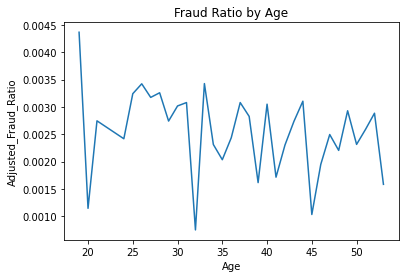

In [69]:
# 시각화로 확인

# 나이에 따른 데이터 정렬
his_data = age_joined_df['FN_ratio_age'].reset_index().sort_values(by = 'index')

# 선 그리기
plt.plot(his_data['index'], his_data['FN_ratio_age'])

# 그래프에 제목과 라벨 추가
plt.title('Fraud Ratio by Age')
plt.xlabel('Age')
plt.ylabel('Adjusted_Fraud_Ratio')

# 그래프 표시
plt.show()

### Insight
1. 나이에 따른 사기 비율은 전체적으로 Random 하게 보인다.
2. 이는 사기 거래와 나이는 independent 함을 의미한다.
3. 그러므로, 이상 거래 예측 모델링에 age 변수는 제거하기로 한다.

In [70]:
# age 컬럼 삭제
cc_target_df.drop(['age'], axis = 1, inplace = True)
cc_non_target_df.drop(['age'], axis = 1, inplace = True)

# 3-14. trans_num 컬럼

- 거래 고유 ID 이므로 예측 모델링에서는 삭제한다.

In [71]:
# trans_num 컬럼 삭제
cc_target_df.drop(['trans_num'], axis = 1, inplace = True)
cc_non_target_df.drop(['trans_num'], axis = 1, inplace = True)

# 3-15. unix_time 컬럼

- 시간 흐름에 따른 사기 거래 발생 빈도를 시각화 해본다

In [72]:
def unix_timestamp_to_year_month(unix_timestamp):
    # Unix 시간을 datetime으로 변환
    dt_object = datetime.utcfromtimestamp(unix_timestamp)
    
    # 연월만 포함된 문자열로 변환
    year_month_str = dt_object.strftime('%Y-%m')
    
    return year_month_str

# apply 로 위 함수를 데이터 시리즈에 적용, time 컬럼에 저장
fruad_time = cc_target_df['unix_time'].apply(unix_timestamp_to_year_month)
fruad_time

0       2012-01
1       2012-01
2       2012-01
3       2012-01
4       2012-01
         ...   
1239    2013-12
1240    2013-12
1241    2013-12
1242    2013-12
1243    2013-12
Name: unix_time, Length: 1244, dtype: object

<Figure size 864x432 with 0 Axes>

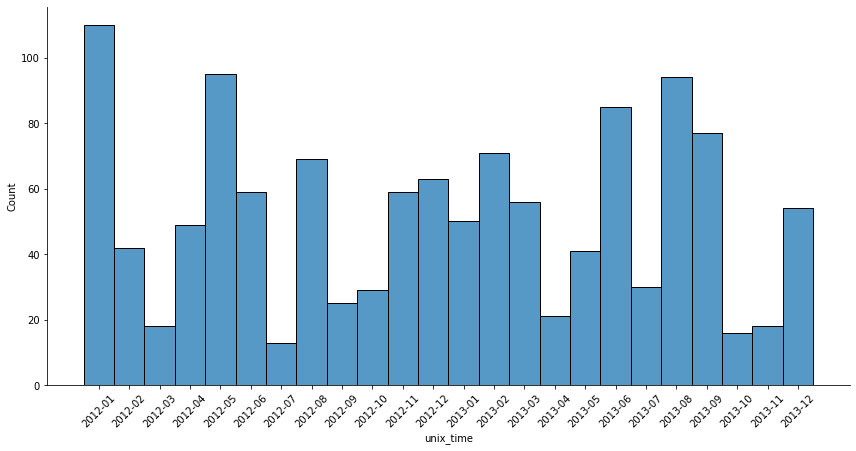

In [73]:
# 시각화

plt.figure(figsize=(12, 6))
sns.displot(fruad_time, height=6, aspect=2)

# x 축 눈금을 45도로 회전
plt.xticks(rotation=45)

plt.show()

## Insight
1. 사기거래 발생 날짜 또한 계절성이나 패턴이 없이 Random 하게 보인다.
2. 따라서 변환한 유닉스 시간 또한 사기 거래 목표값과 독립적이므로 삭제하도록 한다.
3. 사실 유닉스 시간이나 앞서 이상 거래 데이터의 trans_date_trans_time 컬럼이나 같은 데이터이므로 그냥 삭제해도 무관하다.

In [74]:
# unix_time 컬럼 삭제
cc_target_df.drop(['unix_time'], axis = 1, inplace = True)
cc_non_target_df.drop(['unix_time'], axis = 1, inplace = True)

# 3-16.  merch_lat, merch_long 컬럼

- 거래 대상자의 위도와 경도는 분석에 사용하지 않으므로 삭제한다.

In [75]:
# merch_lat, merch_long 컬럼 삭제
cc_target_df.drop(['merch_lat', 'merch_long'], axis = 1, inplace = True)
cc_non_target_df.drop(['merch_lat', 'merch_long'], axis = 1, inplace = True)

# 4. 로지스틱 회귀 모델링을 위한 전처리

In [76]:
cc_target_df.head()

,cc_num,merchant,category,paid_amount,gender,dob,is_fraud,FN_ratio_category,holder_name,FN_ratio_state,FN_ratio_job,time_difference
0,581686439828,"Zieme, Bode and Dooley",gas_transport,11.73,M,1973-07-28,1,2.194269,Larry House,2.541793,2.737476,18441 days 17:50:17.996892
1,581686439828,Koepp-Witting,grocery_pos,328.68,M,1973-07-28,1,5.055943,Larry House,2.541793,2.737476,18441 days 17:50:17.996892
2,581686439828,Abernathy and Sons,food_dining,120.58,M,1973-07-28,1,1.723180,Larry House,2.541793,2.737476,18441 days 17:50:17.996892
3,581686439828,Boyer-Reichert,shopping_net,1081.35,M,1973-07-28,1,6.176778,Larry House,2.541793,2.737476,18441 days 17:50:17.996892
4,581686439828,Fisher-Schowalter,shopping_net,776.70,M,1973-07-28,1,6.176778,Larry House,2.541793,2.737476,18441 days 17:50:17.996892


In [77]:
cc_target_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1244 entries, 0 to 1243
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   cc_num             1244 non-null   int64          
 1   merchant           1244 non-null   object         
 2   category           1244 non-null   object         
 3   paid_amount        1244 non-null   float64        
 4   gender             1244 non-null   object         
 5   dob                1244 non-null   datetime64[ns] 
 6   is_fraud           1244 non-null   int64          
 7   FN_ratio_category  1244 non-null   float64        
 8   holder_name        1244 non-null   object         
 9   FN_ratio_state     1244 non-null   float64        
 10  FN_ratio_job       1244 non-null   float64        
 11  time_difference    1244 non-null   timedelta64[ns]
dtypes: datetime64[ns](1), float64(4), int64(2), object(4), timedelta64[ns](1)
memory usage: 126.3+ KB


## 1) 분석에 불필요한 컬럼 제거

In [78]:
# cc_num, category, merchant, dob, holder_name, time_difference,  FN_ratio_job컬럼 삭제
cc_target_df.drop(['cc_num', 'category', 'merchant', 'dob', 
                   'holder_name', 'time_difference', 'FN_ratio_job'], axis = 1, inplace = True)
cc_non_target_df.drop(['cc_num', 'category', 'merchant', 'dob', 
                       'holder_name', 'time_difference','FN_ratio_job'], axis = 1, inplace = True)

In [79]:
cc_target_df

,paid_amount,gender,is_fraud,FN_ratio_category,FN_ratio_state
0,11.73,M,1,2.194269,2.541793
1,328.68,M,1,5.055943,2.541793
2,120.58,M,1,1.723180,2.541793
3,1081.35,M,1,6.176778,2.541793
4,776.70,M,1,6.176778,2.541793
...,...,...,...,...,...
1239,358.24,F,1,5.055943,2.520046
1240,859.12,F,1,6.176778,2.520046
1241,209.84,F,1,1.661283,2.520046
1242,123.58,F,1,1.723180,2.520046


In [80]:
cc_non_target_df

,paid_amount,gender,is_fraud,FN_ratio_category,FN_ratio_state
0,107.23,F,0,5.055943,2.488446
1,44.71,M,0,5.055943,2.985446
2,46.28,F,0,0.326717,2.985446
3,64.09,M,0,5.055943,2.319778
4,25.58,F,0,1.758662,2.059555
...,...,...,...,...,...
489885,134.26,F,0,1.661283,1.899035
489886,25.49,F,0,2.771745,3.175196
489887,111.84,M,0,1.687554,2.418331
489888,86.88,F,0,1.687554,2.488446


## 2) 이상 거래 데이터와 정상 거래 데이터 다시 합치기

In [81]:
cc_df_ready = pd.concat([cc_target_df, cc_non_target_df]).reset_index(drop = True)
cc_df_ready

,paid_amount,gender,is_fraud,FN_ratio_category,FN_ratio_state
0,11.73,M,1,2.194269,2.541793
1,328.68,M,1,5.055943,2.541793
2,120.58,M,1,1.723180,2.541793
3,1081.35,M,1,6.176778,2.541793
4,776.70,M,1,6.176778,2.541793
...,...,...,...,...,...
491129,134.26,F,0,1.661283,1.899035
491130,25.49,F,0,2.771745,3.175196
491131,111.84,M,0,1.687554,2.418331
491132,86.88,F,0,1.687554,2.488446


## 3) gender 컬럼 원핫인코딩

In [82]:
cc_df_ready = pd.get_dummies(cc_df_ready, columns = ['gender'], drop_first = True)
cc_df_ready

,paid_amount,is_fraud,FN_ratio_category,FN_ratio_state,gender_M
0,11.73,1,2.194269,2.541793,1
1,328.68,1,5.055943,2.541793,1
2,120.58,1,1.723180,2.541793,1
3,1081.35,1,6.176778,2.541793,1
4,776.70,1,6.176778,2.541793,1
...,...,...,...,...,...
491129,134.26,0,1.661283,1.899035,0
491130,25.49,0,2.771745,3.175196,0
491131,111.84,0,1.687554,2.418331,1
491132,86.88,0,1.687554,2.488446,0


## 4) 스케일링

- paid_amount 단위가 크고, 이상치가 많이 포함되어 있으므로 RobustScaler 를 채택하기로 한다.

In [83]:
from sklearn.preprocessing import RobustScaler

In [84]:
rs = RobustScaler()

In [85]:
rs.fit(cc_df_ready)

RobustScaler()

In [86]:
scaled_cc_df = pd.DataFrame(rs.transform(cc_df_ready), columns = cc_df_ready.columns)
scaled_cc_df

,paid_amount,is_fraud,FN_ratio_category,FN_ratio_state,gender_M
0,-0.426510,1.0,0.382601,0.089858,1.0
1,4.014432,1.0,2.896061,0.089858,1.0
2,1.098641,1.0,-0.031165,0.089858,1.0
3,14.560460,1.0,3.880510,0.089858,1.0
4,10.291859,1.0,3.880510,0.089858,1.0
...,...,...,...,...,...
491129,1.290318,0.0,-0.085530,-0.992818,0.0
491130,-0.233712,0.0,0.889808,1.156776,0.0
491131,0.976180,0.0,-0.062455,-0.118104,1.0
491132,0.626454,0.0,-0.062455,0.000000,0.0


In [87]:
scaled_cc_df.isna().sum()

paid_amount          0
is_fraud             0
FN_ratio_category    0
FN_ratio_state       0
gender_M             0
dtype: int64

# 5. 주성분 분석

In [88]:
from sklearn.decomposition import PCA

In [89]:
pca = PCA()

In [90]:
pca.fit(scaled_cc_df)

PCA()

In [91]:
# 결과를 데이터프레임으로
pd.DataFrame(pca.transform(scaled_cc_df))

,0,1,2,3,4
0,-0.831588,0.218530,0.030282,0.710496,-0.999311
1,3.838328,-1.835868,0.124289,0.752158,-0.984951
2,0.644121,0.783430,0.049863,0.718049,-0.995243
3,14.428183,-1.755623,0.297944,0.824728,-0.954220
4,10.181809,-2.184533,0.231620,0.797462,-0.966389
...,...,...,...,...,...
491129,0.851527,0.843376,-1.071803,-0.235662,0.003542
491130,-0.601475,-0.262623,1.061578,-0.330193,0.001528
491131,0.519636,0.800939,-0.160961,0.724938,0.004220
491132,0.177392,0.761794,-0.090103,-0.281328,0.002437


In [92]:
# 주성분 별 전체 분산을 설명하는 비율 확인
pca.explained_variance_ratio_ 

array([6.27142583e-01, 2.32585287e-01, 1.15143343e-01, 2.48222145e-02,
       3.06573502e-04])

## 해석 1. (2부터는 회고 도중 작성)
1. paid_amount 의 원래 값에 극단값이 많이 포함되어 있어 첫번째 주성분이 전체 분산을 설명하는 비율이 높게 나온 듯으로 생각된다.
2. 그렇다면 차원축소 이전 예측변수 가운데 반응변수에 대해 유독 강력한 상관관계를 가진 변수가 있을 것이다. 그래서 밑에 상관관계 분석을 시행하여 확인해 보았다.

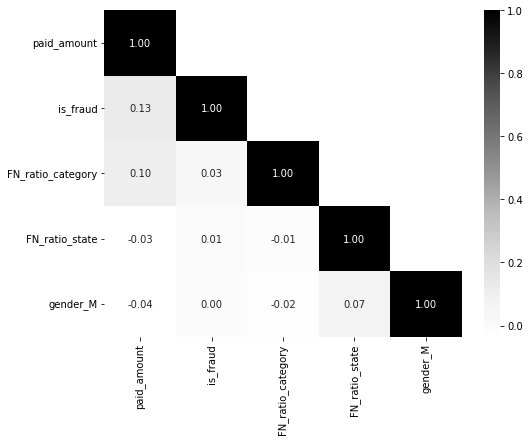

In [110]:
# 상관관계 분석. 차원축소 하기 전 데이터 cc_df_ready
corr = cc_df_ready.corr()

mask = np.zeros_like(corr)   
mask[np.triu_indices_from(mask, k=1)] = True 

# 히트맵 그리기
plt.figure(figsize=(8, 6))
sns.heatmap(corr, mask=mask, cmap='Greys', annot=True, fmt='.2f')
plt.show()

# 해석 2 (회고 도중 작성)

1. 상관관계 분석을 해보니 생각과 다르게 강한 상관관계가 나타나지 않았다...
2. 일단 독립 변수들 간에 상관관계가 없는 것은 서로 독립적이라는 긍정인 결과라고 생각한다.
3. 개별적으로는 종속변수와 다른 독립변수들 간에 상관관계가 없지만, 이러한 독립변수를 조합했더니 종속변수를 잘 설명해서 예측 퍼포먼스가 높은 것인가?? 이 부분에 대해 질문해보고 싶다.

# 6. 로지스틱 회귀 예측 모델링

- binary prediction 을 위해 로지스틱 회귀 모델을 사용한다.

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [108]:
df = pd.DataFrame(data=scaled_cc_df, columns = scaled_cc_df.columns)
df['target'] = scaled_cc_df['is_fraud']

# 특성과 목표값 나누기
X = df.drop('target', axis=1)
y = df['target']

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 로지스틱 회귀 모델 생성
model = LogisticRegression()
model.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

# 혼동 행렬(confusion matrix) 출력
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# 분류 보고서 출력
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[97958     0]
 [    0   269]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     97958
         1.0       1.00      1.00      1.00       269

    accuracy                           1.00     98227
   macro avg       1.00      1.00      1.00     98227
weighted avg       1.00      1.00      1.00     98227



# 결론.. 잠깐 이게??

1. 솔직히 왜 이렇게 나오는지 잘 모르겠다.. 뭔가 잘못된 것인지.. 
2. 데이터 갯수가 많아서 과적합될 수 있는 것인지... 
3. validation 하는 방법도 있는데 잘 기억이 나지 않아서.. 이 부분에 대해서는 질문을 해야 할 것 같다.

# 회고

1. 중간에 다중회귀를 사용했는데 RMSE 가 0 값이 나오고 R square 값이 0.01 이 나와서 의아했다.


2. 생각해보니 목표값이 0와 1인 예측 과제를 다중회귀로 모델링하겠다는 착각을 했었다. 바로 로지스틱 회귀로 바꿔서 예측 테스크를 진행했다.


3. 데이터 탐색, 전처리 단계에서 데이터에 애정이나 가치를 느끼지 못하면 이 일을 지속할 수 없겠다는 생각이 들었다...


4. 데이터를 탐색하는 과정에서 한 사람이 여러 사기 거래를 진행했다는 사실을 알게 되었다. FN_ratio_category, FN_ratio_state, FN_ratio_job(job은 결측치가 발생해서 사용 못했지만...) 과 같이 사기 거래 비율을 반영한 새로운 컬럼들은 사실 한 사람이 여러 번 저지른 사기 거래 정보를 반영한 것이다. 사기 거래 기준을 사건 횟수로 할 것인지 저지른 사람을 기준으로 카운팅할 것인지와 같은 고민을 다른 비슷한 문제를 만나면 해야할 것 같다.


5. Fraud Detection 은 관심있는 분야이기도 한데, 이번 프로젝트를 계기로 더 적극적이게 찾아보게 될 것 같다.


6. 데이터를 치밀하게 들여다보는 일은 내가 진짜 좋아하고 관심있는 분야라야 제대로할 마음이 생길 것 같다.